In [1]:
import os
import torch
import open_clip
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import shutil
import os
from PIL import Image
from tqdm import tqdm
import torch
import open_clip
import numpy as np
from sklearn.cluster import KMeans
import shutil
import random

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
IMAGE_DIR = "dataset/eyes/"
CLEAN_DIR = "cleaned_dataset/"
SIMILARITY_THRESHOLD = 0.25  # smaller = stricter filtering
N_CLUSTERS = 12

In [3]:
# Step 1 — Convert all images to .webp
print("🔄 Converting all images to .webp format...")
for file in tqdm(os.listdir(IMAGE_DIR)):
    path = os.path.join(IMAGE_DIR, file)
    try:
        with Image.open(path) as img:
            new_path = os.path.splitext(path)[0] + ".webp"
            img.convert("RGB").save(new_path, "webp")
            if path != new_path and os.path.exists(path):
                os.remove(path)
    except Exception as e:
        print(f"Skipping {file}: {e}")
        if os.path.exists(path):
            os.remove(path)

🔄 Converting all images to .webp format...


  0%|          | 0/1828 [00:00<?, ?it/s]

  1%|          | 12/1828 [00:00<00:55, 32.73it/s]

Skipping 10579.svg: cannot identify image file 'dataset/eyes/10579.svg'


  3%|▎         | 46/1828 [00:01<01:12, 24.63it/s]

Skipping 10018.svg: cannot identify image file 'dataset/eyes/10018.svg'


  5%|▍         | 87/1828 [00:02<00:36, 47.64it/s]

Skipping 10004.svg: cannot identify image file 'dataset/eyes/10004.svg'
Skipping 10728.svg: cannot identify image file 'dataset/eyes/10728.svg'


  7%|▋         | 119/1828 [00:03<00:54, 31.26it/s]

Skipping 10900.svg: cannot identify image file 'dataset/eyes/10900.svg'


  9%|▉         | 161/1828 [00:05<01:07, 24.56it/s]

Skipping 11422.svg: cannot identify image file 'dataset/eyes/11422.svg'


 21%|██        | 383/1828 [00:08<00:14, 102.07it/s]

Skipping 10014.svg: cannot identify image file 'dataset/eyes/10014.svg'


 25%|██▍       | 454/1828 [00:08<00:12, 113.96it/s]

Skipping 10001.svg: cannot identify image file 'dataset/eyes/10001.svg'


 30%|██▉       | 546/1828 [00:09<00:10, 116.71it/s]

Skipping 10007.svg: cannot identify image file 'dataset/eyes/10007.svg'


 32%|███▏      | 584/1828 [00:10<00:13, 94.40it/s] 

Skipping 10517.svg: cannot identify image file 'dataset/eyes/10517.svg'
Skipping 10536.svg: cannot identify image file 'dataset/eyes/10536.svg'


 33%|███▎      | 610/1828 [00:10<00:12, 100.26it/s]

Skipping 11120.svg: cannot identify image file 'dataset/eyes/11120.svg'


 36%|███▌      | 656/1828 [00:10<00:12, 97.51it/s] 

Skipping 10011.svg: cannot identify image file 'dataset/eyes/10011.svg'


 38%|███▊      | 700/1828 [00:11<00:11, 94.53it/s]

Skipping 10012.svg: cannot identify image file 'dataset/eyes/10012.svg'


 41%|████      | 748/1828 [00:11<00:09, 113.78it/s]

Skipping 11324.svg: cannot identify image file 'dataset/eyes/11324.svg'
Skipping 10010.svg: cannot identify image file 'dataset/eyes/10010.svg'


 47%|████▋     | 853/1828 [00:12<00:07, 123.81it/s]

Skipping 10006.svg: cannot identify image file 'dataset/eyes/10006.svg'


 48%|████▊     | 878/1828 [00:13<00:08, 116.96it/s]

Skipping 11582.svg: cannot identify image file 'dataset/eyes/11582.svg'
Skipping 10555.svg: cannot identify image file 'dataset/eyes/10555.svg'


 55%|█████▍    | 1003/1828 [00:14<00:06, 128.72it/s]

Skipping 11616.svg: cannot identify image file 'dataset/eyes/11616.svg'


 65%|██████▍   | 1183/1828 [00:17<00:14, 44.78it/s] 

Skipping 10017.svg: cannot identify image file 'dataset/eyes/10017.svg'


 67%|██████▋   | 1218/1828 [00:17<00:12, 48.19it/s]

Skipping 10552.svg: cannot identify image file 'dataset/eyes/10552.svg'


 68%|██████▊   | 1235/1828 [00:18<00:09, 62.13it/s]

Skipping 10537.svg: cannot identify image file 'dataset/eyes/10537.svg'


 70%|███████   | 1280/1828 [00:18<00:05, 105.46it/s]

Skipping 10539.svg: cannot identify image file 'dataset/eyes/10539.svg'
Skipping 10534.svg: cannot identify image file 'dataset/eyes/10534.svg'


 81%|████████  | 1477/1828 [00:20<00:02, 121.48it/s]

Skipping 10013.svg: cannot identify image file 'dataset/eyes/10013.svg'
Skipping 10022.svg: cannot identify image file 'dataset/eyes/10022.svg'
Skipping 10002.svg: cannot identify image file 'dataset/eyes/10002.svg'
Skipping 10015.svg: cannot identify image file 'dataset/eyes/10015.svg'


 84%|████████▍ | 1532/1828 [00:20<00:02, 113.99it/s]

Skipping 10723.svg: cannot identify image file 'dataset/eyes/10723.svg'
Skipping 10005.svg: cannot identify image file 'dataset/eyes/10005.svg'


 88%|████████▊ | 1608/1828 [00:21<00:01, 123.47it/s]

Skipping 10021.svg: cannot identify image file 'dataset/eyes/10021.svg'


 90%|█████████ | 1649/1828 [00:21<00:01, 122.95it/s]

Skipping 10003.svg: cannot identify image file 'dataset/eyes/10003.svg'
Skipping 11544.svg: cannot identify image file 'dataset/eyes/11544.svg'


 92%|█████████▏| 1687/1828 [00:22<00:01, 111.51it/s]

Skipping 10531.svg: cannot identify image file 'dataset/eyes/10531.svg'


 97%|█████████▋| 1765/1828 [00:22<00:00, 124.38it/s]

Skipping 10019.svg: cannot identify image file 'dataset/eyes/10019.svg'
Skipping 10939.svg: cannot identify image file 'dataset/eyes/10939.svg'


 99%|█████████▊| 1805/1828 [00:23<00:00, 126.00it/s]

Skipping 10020.svg: cannot identify image file 'dataset/eyes/10020.svg'
Skipping 10016.svg: cannot identify image file 'dataset/eyes/10016.svg'


100%|██████████| 1828/1828 [00:23<00:00, 78.16it/s] 


In [4]:
print("\n⚙️ Loading CLIP model...")
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
model.eval()


⚙️ Loading CLIP model...


/usr/local/lib/python3.11/site-packages/open_clip/factory.py:450: UserWarning: QuickGELU mismatch between final model config (quick_gelu=False) and pretrained tag 'openai' (quick_gelu=True).
  warnings.warn(


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine

In [7]:
print("\n🧠 Generating image embeddings...")
embeddings, image_paths = [], []
with torch.no_grad():
    for file in tqdm(os.listdir(IMAGE_DIR)):
        if file.lower().endswith(".webp"):
            img_path = os.path.join(IMAGE_DIR, file)
            image = preprocess(Image.open(img_path).convert('RGB')).unsqueeze(0)
            feat = model.encode_image(image)
            feat /= feat.norm(dim=-1, keepdim=True)
            embeddings.append(feat.squeeze().cpu().numpy())
            image_paths.append(img_path)

embeddings = np.vstack(embeddings)
np.save("embeddings.npy", embeddings)


🧠 Generating image embeddings...


  0%|          | 0/1789 [00:00<?, ?it/s]

100%|██████████| 1789/1789 [12:57<00:00,  2.30it/s]


In [8]:
print("\n🔍 Clustering images into visual groups...")
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
labels = kmeans.fit_predict(embeddings)


🔍 Clustering images into visual groups...


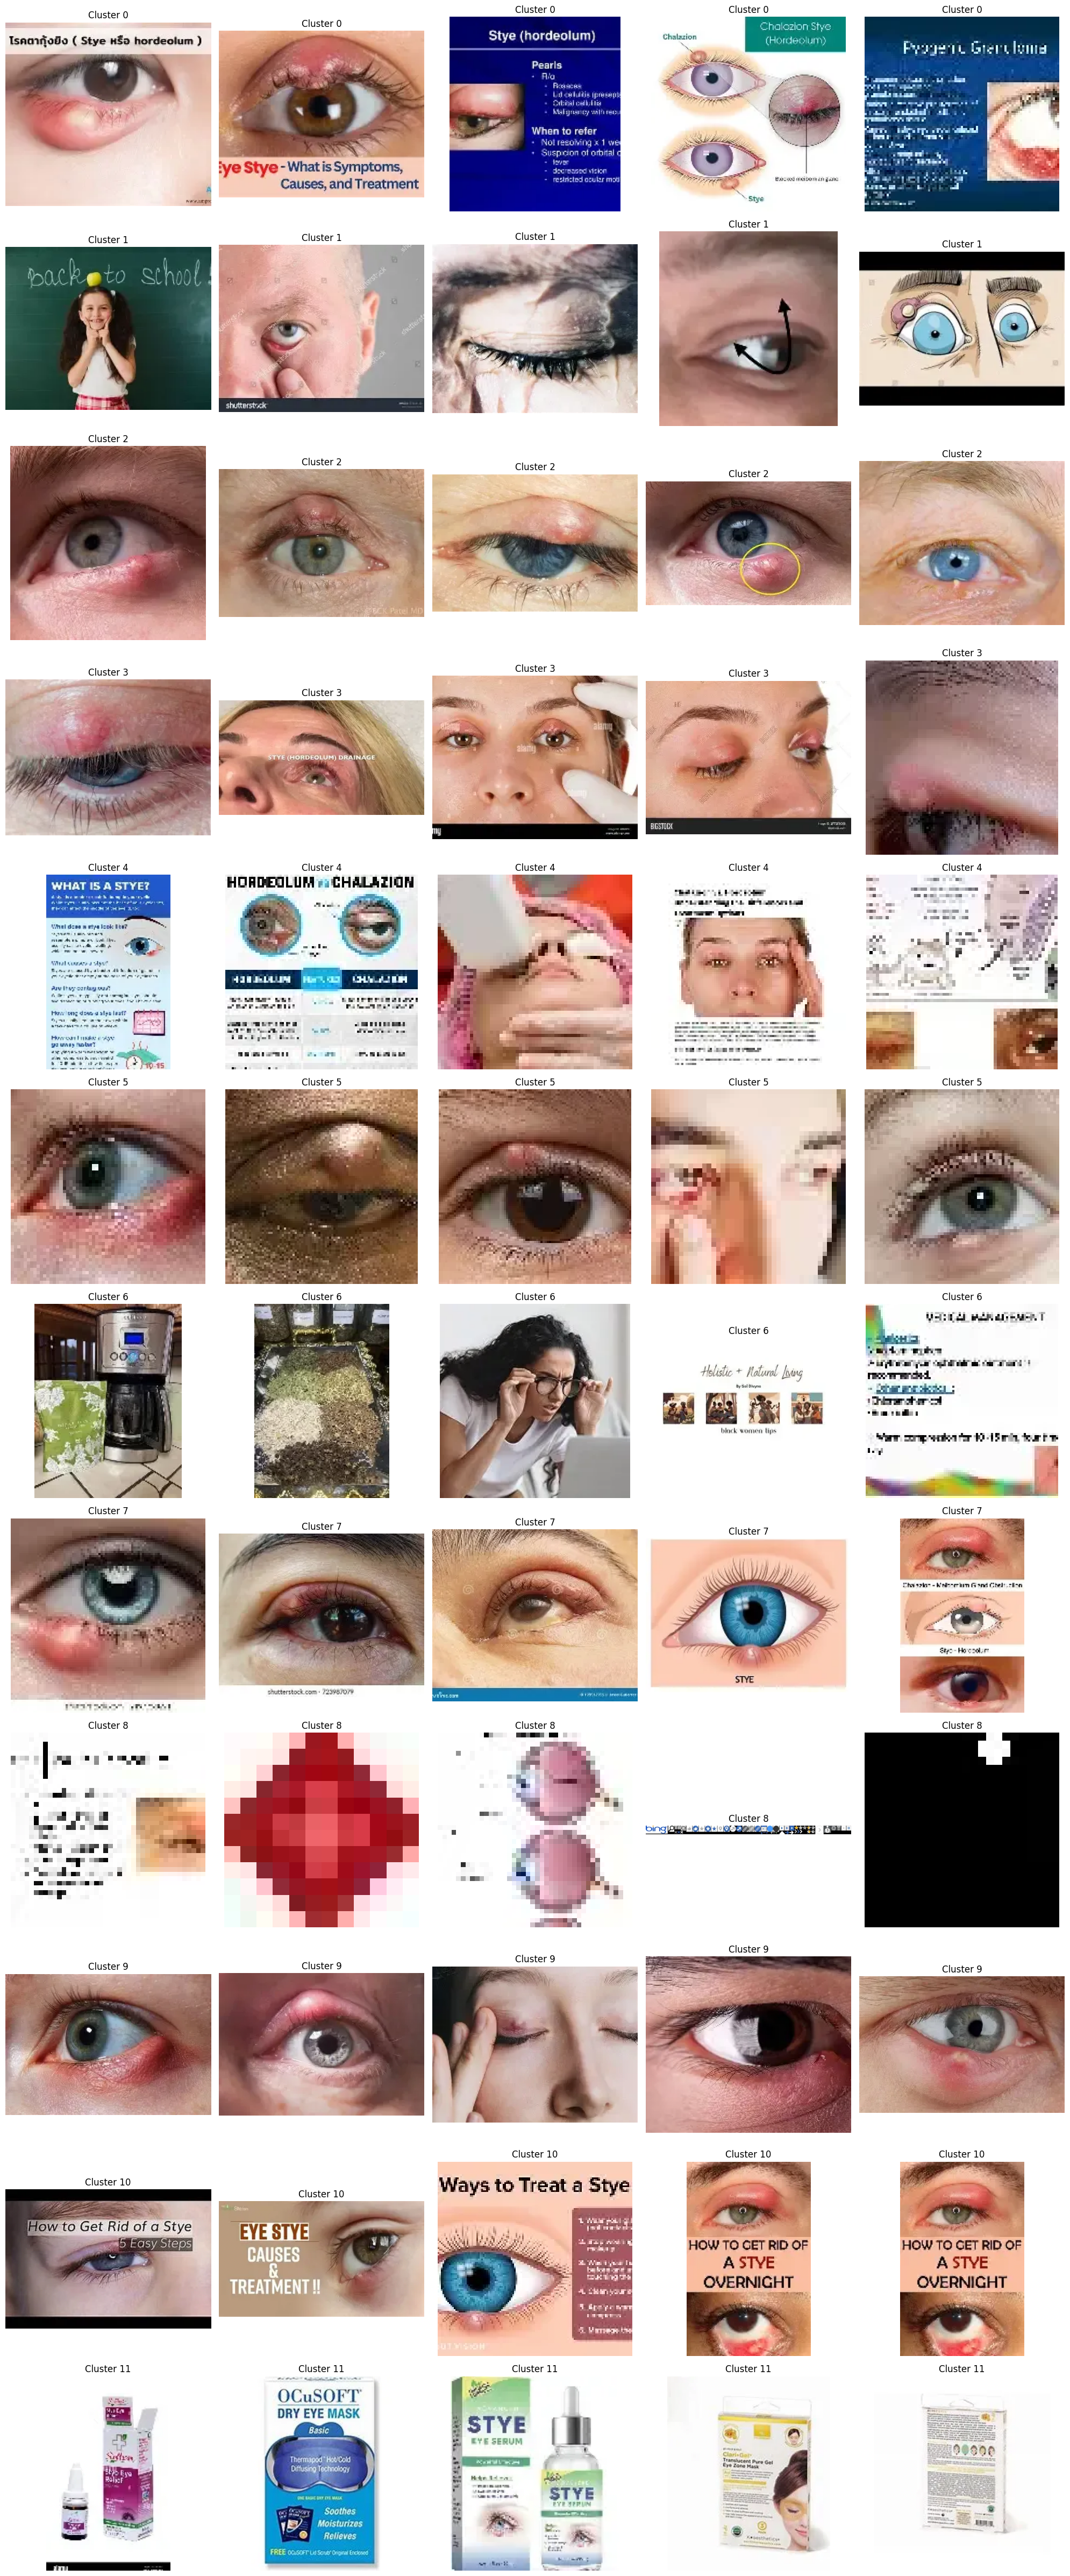

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4*N_CLUSTERS))

for i in range(N_CLUSTERS):
    samples = [p for p, l in zip(image_paths, labels) if l == i]
    sample_paths = random.sample(samples, min(5, len(samples)))
    
    for j, path in enumerate(sample_paths):
        img = Image.open(path)
        plt.subplot(N_CLUSTERS, 5, i*5 + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Cluster {i}')

plt.tight_layout()
plt.show()

In [10]:
real_clusters = [2,3,5,7,9]


In [11]:
os.makedirs(CLEAN_DIR, exist_ok=True)
for path, label in zip(image_paths, labels):
    if label in real_clusters:
        shutil.copy(path, CLEAN_DIR)

print(f"\n✅ Done! Copied real-eye images to: {CLEAN_DIR}")



✅ Done! Copied real-eye images to: cleaned_dataset/


In [ ]:
DATASET_DIR = "cleaned_dataset/"
REFERENCE_DIR = "reference_eyes/"  # folder with 3–5 good eye images like your first example
CLEANED_DIR = "final_cleaned/"
SIMILARITY_THRESHOLD = 0.15  # smaller = stricter filtering

In [16]:
ref_embeddings = []
for file in os.listdir(REFERENCE_DIR):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
        img = preprocess(Image.open(os.path.join(REFERENCE_DIR, file)).convert('RGB')).unsqueeze(0)
        with torch.no_grad():
            feat = model.encode_image(img)
            feat /= feat.norm(dim=-1, keepdim=True)
        ref_embeddings.append(feat.squeeze().cpu().numpy())

ref_embeddings = np.vstack(ref_embeddings)

In [17]:
# Load the previously computed embeddings
all_embeddings = np.load("embeddings.npy")
all_image_paths = [p for p in image_paths]  # Create a copy of the original image paths

# Get the files in cleaned_dataset
dataset_paths = [os.path.join(DATASET_DIR, f) for f in os.listdir(DATASET_DIR) 
                if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))]

# Find indices of cleaned_dataset images in the original dataset
dataset_embeddings = []
filtered_dataset_paths = []

for clean_path in tqdm(dataset_paths):
    # Get the filename without directory
    clean_filename = os.path.basename(clean_path)
    # Find matching original path
    for i, orig_path in enumerate(all_image_paths):
        if os.path.basename(orig_path) == clean_filename:
            dataset_embeddings.append(all_embeddings[i])
            filtered_dataset_paths.append(clean_path)
            break

dataset_embeddings = np.vstack(dataset_embeddings)
dataset_paths = filtered_dataset_paths

print(f"Reused embeddings for {len(dataset_paths)} images")

 23%|██▎       | 208/917 [00:00<00:00, 1934.81it/s]

100%|██████████| 917/917 [00:01<00:00, 543.02it/s] 

Reused embeddings for 912 images


In [18]:
# Step 4 — Find similarity to reference eyes
nn = NearestNeighbors(n_neighbors=1, metric='cosine').fit(ref_embeddings)
distances, _ = nn.kneighbors(dataset_embeddings)

In [19]:
# Step 5 — Keep only those similar enough to real eyes
os.makedirs(CLEANED_DIR, exist_ok=True)
kept = 0

for path, dist in zip(dataset_paths, distances):
    if dist[0] < SIMILARITY_THRESHOLD:
        shutil.copy(path, CLEANED_DIR)
        kept += 1

print(f"\n✅ Kept {kept} of {len(dataset_paths)} images in {CLEANED_DIR}")


✅ Kept 743 of 912 images in final_cleaned/
